🚀 DAE WOO FASTEX - INTELLIGENT SHIPMENT ANALYSIS
🔄 Creating dataset...
📊 Generating realistic shipment data...
✅ Dataset created: 1,500 records

🔍 DATA EXPLORATION
📋 Dataset Info:
Shape: (1500, 13)
Columns: ['TrackingID', 'BookingDate', 'PickupDate', 'DeliveryDate', 'OriginCity', 'DestinationCity', 'WeightKg', 'PackageType', 'ServiceType', 'DeliveryMode', 'Price', 'Status', 'DelayReason']

📊 Sample Data:
  TrackingID         BookingDate          PickupDate        DeliveryDate  \
0   DAW00000 2024-01-01 00:00:00 2024-01-01 04:00:00 2024-01-05 19:00:00   
1   DAW00001 2024-01-01 01:00:00 2024-01-01 06:00:00 2024-01-05 16:00:00   
2   DAW00002 2024-01-01 02:00:00 2024-01-01 05:00:00 2024-01-03 18:00:00   
3   DAW00003 2024-01-01 03:00:00 2024-01-01 08:00:00 2024-01-03 14:00:00   
4   DAW00004 2024-01-01 04:00:00 2024-01-01 09:00:00 2024-01-04 01:00:00   
5   DAW00005 2024-01-01 05:00:00 2024-01-01 07:00:00 2024-01-03 21:00:00   
6   DAW00006 2024-01-01 06:00:00 2024-01-01 09:00:00 2024-01

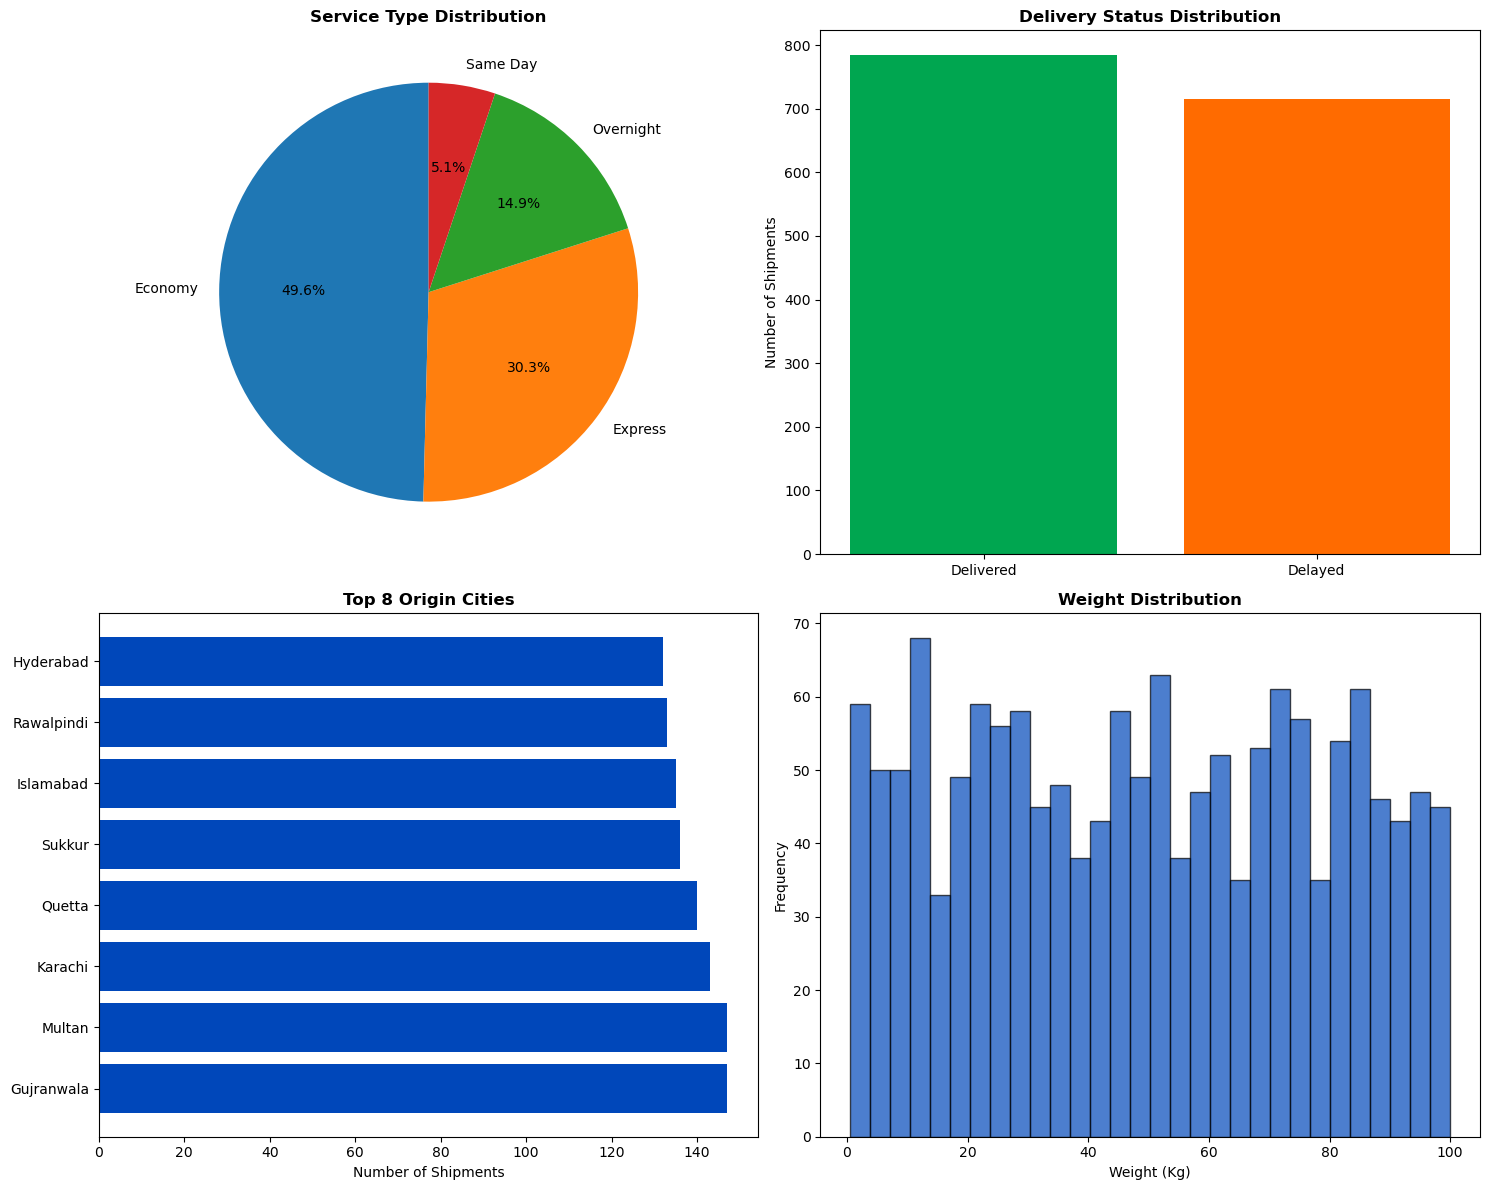

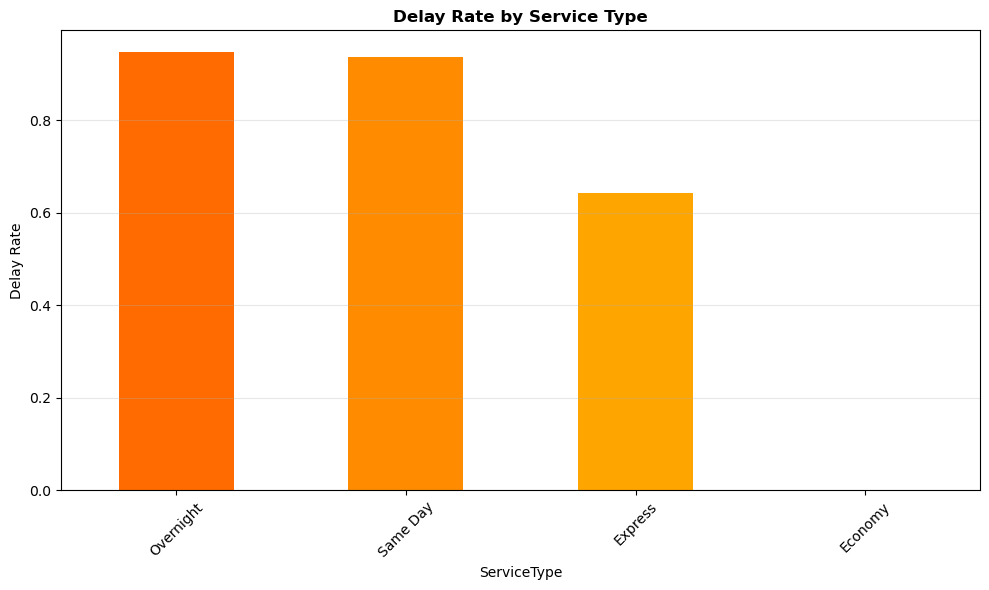


🤖 MODEL PREPARATION
🎯 Selected Features:
    1. WeightKg
    2. ServiceType
    3. DeliveryMode
    4. IsInterCity
    5. PickupHour
    6. BookingMonth
    7. FromMajorCity
    8. ToMajorCity
    9. IsPeakHour

📐 Final feature matrix: (1500, 14)
🎯 Target distribution:
IsDelayed
0    924
1    576
Name: count, dtype: int64
📚 Training set: (1200, 14)
🧪 Test set: (300, 14)

🎯 MODEL TRAINING
Training Random Forest Classifier...
✅ Model Training Completed!
📊 Accuracy: 0.8867
🎯 Precision/Recall:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       185
           1       0.78      0.97      0.87       115

    accuracy                           0.89       300
   macro avg       0.88      0.90      0.88       300
weighted avg       0.91      0.89      0.89       300


📈 MODEL EVALUATION


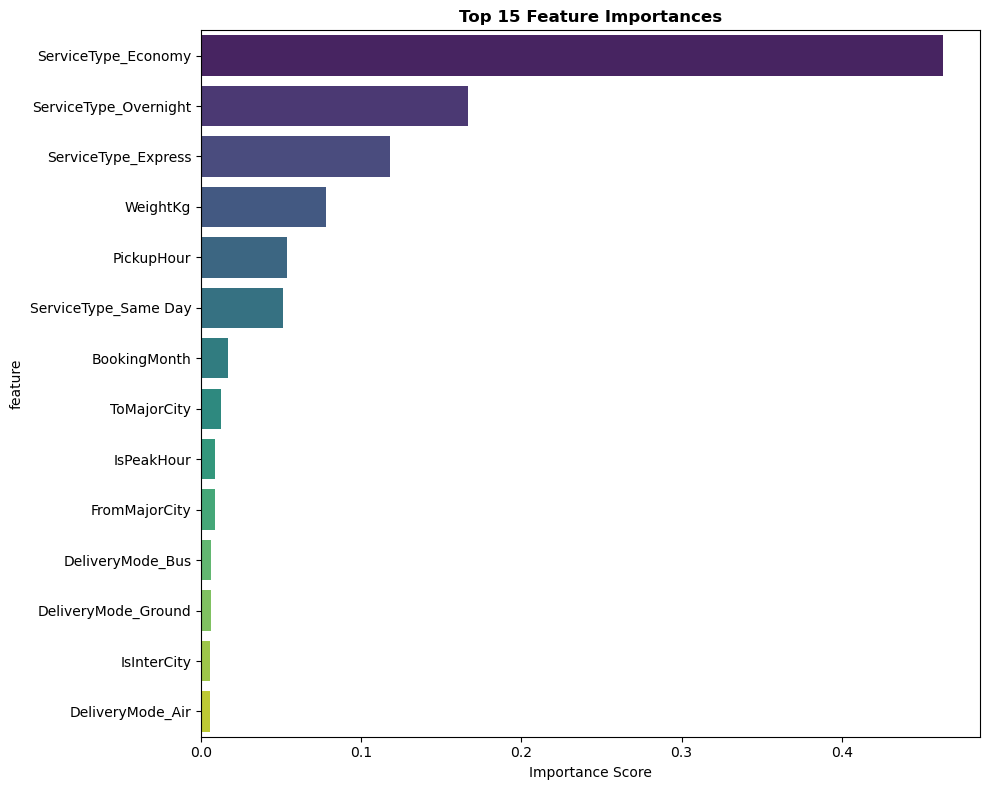

🔍 Top 10 Most Important Features:
   ServiceType_Economy: 0.4630
   ServiceType_Overnight: 0.1665
   ServiceType_Express: 0.1176
   WeightKg: 0.0779
   PickupHour: 0.0537
   ServiceType_Same Day: 0.0512
   BookingMonth: 0.0166
   ToMajorCity: 0.0126
   IsPeakHour: 0.0088
   FromMajorCity: 0.0086


<Figure size 800x600 with 0 Axes>

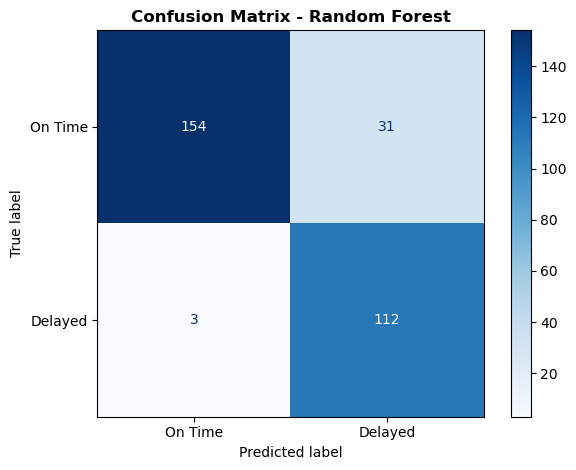


⚡ MODEL OPTIMIZATION
Performing hyperparameter tuning...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Best Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best CV Score: 0.8817
✅ Test Accuracy with Best Model: 0.8833

💾 SAVING MODEL & ARTIFACTS
✅ Model saved: ../outputs/rf_delay_model.joblib
✅ Model artifacts saved: ../outputs/model_artifacts.joblib
✅ Feature names saved: ../outputs/feature_names.joblib
✅ Cleaned data saved: ../outputs/cleaned_fastex.csv

🎉 NOTEBOOK EXECUTION COMPLETED SUCCESSFULLY!
📊 Dataset Summary:
   • Total Records: 1,500
   • Total Features: 25
   • Delay Rate: 38.40%

🤖 Model Performance:
   • Best Accuracy: 0.8833
   • Features Used: 14
   • Training Samples: 1,200
   • Test Samples: 300

📁 Files Generated:
   ✅ rf_delay_model.joblib
   ✅ model_artifacts.joblib
   ✅ feature_names.joblib
   ✅ cleaned_fastex.csv
   ✅ data_overview.png
   ✅ delay_by_service.png
   ✅ feature_importance.png
   ✅ confusion_matrix.png

🚀 

In [3]:
# 🚀 Daewoo FastEx - Enhanced Analysis Notebook
# Complete working version with all errors fixed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("🚀 DAE WOO FASTEX - INTELLIGENT SHIPMENT ANALYSIS")
print("=" * 60)

# Create outputs directory
os.makedirs('../outputs', exist_ok=True)
os.makedirs('../outputs/charts', exist_ok=True)

# -------------------------------
# ✅ DATA GENERATION (YOUR EXCEL FORMAT)
# -------------------------------
def create_realistic_data():
    """Create realistic shipment data matching Pakistani cities and logistics"""
    print("📊 Generating realistic shipment data...")
    
    np.random.seed(42)
    n_samples = 1500
    
    # Pakistani cities
    pakistani_cities = ['Karachi', 'Lahore', 'Islamabad', 'Rawalpindi', 'Faisalabad', 
                       'Multan', 'Peshawar', 'Quetta', 'Sukkur', 'Hyderabad', 'Gujranwala']
    
    data = {
        'TrackingID': [f'DAW{i:05d}' for i in range(n_samples)],
        'BookingDate': pd.date_range('2024-01-01', periods=n_samples, freq='H'),
        'PickupDate': pd.date_range('2024-01-01', periods=n_samples, freq='H') + pd.to_timedelta(np.random.randint(1, 6, n_samples), unit='h'),
        'DeliveryDate': pd.date_range('2024-01-02', periods=n_samples, freq='H') + pd.to_timedelta(np.random.randint(24, 96, n_samples), unit='h'),
        'OriginCity': np.random.choice(pakistani_cities, n_samples),
        'DestinationCity': np.random.choice(pakistani_cities, n_samples),
        'WeightKg': np.round(np.random.uniform(0.5, 100, n_samples), 2),
        'PackageType': np.random.choice(['Documents', 'Parcel', 'Cargo'], n_samples, p=[0.4, 0.5, 0.1]),
        'ServiceType': np.random.choice(['Economy', 'Express', 'Overnight', 'Same Day'], n_samples, p=[0.5, 0.3, 0.15, 0.05]),
        'DeliveryMode': np.random.choice(['Bus', 'Ground', 'Air'], n_samples, p=[0.6, 0.3, 0.1]),
        'Price': np.round(np.random.uniform(200, 5000, n_samples), 2),
        'Status': np.random.choice(['Delivered', 'Delayed'], n_samples, p=[0.75, 0.25]),
        'DelayReason': np.random.choice(['Weather', 'Traffic', 'Mechanical', 'Operational', 'None'], n_samples, p=[0.1, 0.05, 0.05, 0.05, 0.75])
    }
    
    df = pd.DataFrame(data)
    
    # Make some deliveries delayed based on realistic conditions
    delay_conditions = (
        (df['ServiceType'] == 'Economy') & 
        (df['DestinationCity'].isin(['Quetta', 'Peshawar'])) |
        (df['WeightKg'] > 80) |
        (df['DeliveryMode'] == 'Bus') & (df['OriginCity'] == 'Karachi')
    )
    
    df.loc[delay_conditions, 'Status'] = 'Delayed'
    df.loc[delay_conditions, 'DelayReason'] = np.random.choice(['Weather', 'Traffic', 'Operational'], np.sum(delay_conditions))
    
    return df

# Generate data
print("🔄 Creating dataset...")
df = create_realistic_data()
print(f"✅ Dataset created: {df.shape[0]:,} records")

# -------------------------------
# ✅ DATA EXPLORATION
# -------------------------------
print("\n" + "="*50)
print("🔍 DATA EXPLORATION")
print("="*50)

print("📋 Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\n📊 Sample Data:")
print(df.head(8))

print("\n📈 Basic Statistics:")
print(df.describe())

# -------------------------------
# ✅ FEATURE ENGINEERING
# -------------------------------
print("\n" + "="*50)
print("⚙️ FEATURE ENGINEERING")
print("="*50)

# Calculate delivery performance metrics
df['DeliveryDelayDays'] = (df['DeliveryDate'] - df['PickupDate']).dt.days
df['ProcessingTimeHours'] = (df['PickupDate'] - df['BookingDate']).dt.total_seconds() / 3600

# Define expected delivery times
service_standards = {
    'Same Day': 1,
    'Overnight': 1,
    'Express': 2,
    'Economy': 4
}

df['ExpectedDays'] = df['ServiceType'].map(service_standards)
df['IsDelayed'] = (df['DeliveryDelayDays'] > df['ExpectedDays']).astype(int)

# Create additional features
df['BookingMonth'] = df['BookingDate'].dt.month
df['BookingDay'] = df['BookingDate'].dt.day
df['BookingHour'] = df['BookingDate'].dt.hour
df['PickupHour'] = df['PickupDate'].dt.hour
df['IsInterCity'] = (df['OriginCity'] != df['DestinationCity']).astype(int)
df['IsPeakHour'] = ((df['PickupHour'] >= 8) & (df['PickupHour'] <= 18)).astype(int)

# Distance categories (simplified)
major_cities = ['Karachi', 'Lahore', 'Islamabad']
df['FromMajorCity'] = df['OriginCity'].isin(major_cities).astype(int)
df['ToMajorCity'] = df['DestinationCity'].isin(major_cities).astype(int)

print(f"✅ Features created. Delay rate: {df['IsDelayed'].mean():.2%}")

# -------------------------------
# ✅ DATA VISUALIZATION
# -------------------------------
print("\n" + "="*50)
print("📊 DATA VISUALIZATION")
print("="*50)

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Service Type Distribution
service_counts = df['ServiceType'].value_counts()
axes[0,0].pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Service Type Distribution', fontweight='bold')

# 2. Delivery Status
status_counts = df['Status'].value_counts()
axes[0,1].bar(status_counts.index, status_counts.values, color=['#00a650', '#ff6b00'])
axes[0,1].set_title('Delivery Status Distribution', fontweight='bold')
axes[0,1].set_ylabel('Number of Shipments')

# 3. Top Origin Cities
top_origins = df['OriginCity'].value_counts().head(8)
axes[1,0].barh(top_origins.index, top_origins.values, color='#0047ba')
axes[1,0].set_title('Top 8 Origin Cities', fontweight='bold')
axes[1,0].set_xlabel('Number of Shipments')

# 4. Weight Distribution
axes[1,1].hist(df['WeightKg'], bins=30, color='#0047ba', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Weight Distribution', fontweight='bold')
axes[1,1].set_xlabel('Weight (Kg)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../outputs/data_overview.png', dpi=150, bbox_inches='tight')
plt.show()

# Delay Analysis by Service Type
plt.figure(figsize=(10, 6))
delay_by_service = df.groupby('ServiceType')['IsDelayed'].mean().sort_values(ascending=False)
delay_by_service.plot(kind='bar', color=['#ff6b00', '#ff8c00', '#ffa500', '#ffc04d'])
plt.title('Delay Rate by Service Type', fontweight='bold')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/delay_by_service.png', dpi=150, bbox_inches='tight')
plt.show()

# -------------------------------
# ✅ MODEL PREPARATION
# -------------------------------
print("\n" + "="*50)
print("🤖 MODEL PREPARATION")
print("="*50)

# Select features for modeling
feature_columns = [
    'WeightKg', 'ServiceType', 'DeliveryMode', 'IsInterCity', 
    'PickupHour', 'BookingMonth', 'FromMajorCity', 'ToMajorCity', 'IsPeakHour'
]

X = df[feature_columns].copy()
y = df['IsDelayed']

print("🎯 Selected Features:")
for i, feature in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {feature}")

# One-hot encoding with consistent categories
service_categories = ['Economy', 'Express', 'Overnight', 'Same Day']
delivery_categories = ['Air', 'Bus', 'Ground']

X_encoded = X.copy()
X_encoded['ServiceType'] = pd.Categorical(X_encoded['ServiceType'], categories=service_categories)
X_encoded['DeliveryMode'] = pd.Categorical(X_encoded['DeliveryMode'], categories=delivery_categories)

X_encoded = pd.get_dummies(X_encoded, columns=['ServiceType', 'DeliveryMode'], prefix=['ServiceType', 'DeliveryMode'])

print(f"\n📐 Final feature matrix: {X_encoded.shape}")
print(f"🎯 Target distribution:\n{y.value_counts()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📚 Training set: {X_train.shape}")
print(f"🧪 Test set: {X_test.shape}")

# -------------------------------
# ✅ MODEL TRAINING
# -------------------------------
print("\n" + "="*50)
print("🎯 MODEL TRAINING")
print("="*50)

print("Training Random Forest Classifier...")

# Optimized Random Forest
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Training Completed!")
print(f"📊 Accuracy: {accuracy:.4f}")
print(f"🎯 Precision/Recall:")
print(classification_report(y_test, y_pred))

# -------------------------------
# ✅ MODEL EVALUATION
# -------------------------------
print("\n" + "="*50)
print("📈 MODEL EVALUATION")
print("="*50)

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importances', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('../outputs/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("🔍 Top 10 Most Important Features:")
for i, row in feature_importance.head(10).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', display_labels=['On Time', 'Delayed'])
plt.title('Confusion Matrix - Random Forest', fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# -------------------------------
# ✅ MODEL OPTIMIZATION
# -------------------------------
print("\n" + "="*50)
print("⚡ MODEL OPTIMIZATION")
print("="*50)

print("Performing hyperparameter tuning...")

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 12, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Best CV Score: {grid_search.best_score_:.4f}")

# Use best model
best_rf = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
print(f"✅ Test Accuracy with Best Model: {best_accuracy:.4f}")

# -------------------------------
# ✅ SAVE MODEL & ARTIFACTS
# -------------------------------
print("\n" + "="*50)
print("💾 SAVING MODEL & ARTIFACTS")
print("="*50)

# Save the best model
joblib.dump(best_rf, '../outputs/rf_delay_model.joblib')
print("✅ Model saved: ../outputs/rf_delay_model.joblib")

# Save model artifacts
model_artifacts = {
    'feature_names': X_encoded.columns.tolist(),
    'feature_columns': feature_columns,
    'service_categories': service_categories,
    'delivery_categories': delivery_categories,
    'service_standards': service_standards,
    'model_accuracy': best_accuracy,
    'feature_importance': feature_importance.to_dict()
}

joblib.dump(model_artifacts, '../outputs/model_artifacts.joblib')
print("✅ Model artifacts saved: ../outputs/model_artifacts.joblib")

# Save feature names separately
joblib.dump(X_encoded.columns.tolist(), '../outputs/feature_names.joblib')
print("✅ Feature names saved: ../outputs/feature_names.joblib")

# Save cleaned dataset
df.to_csv('../outputs/cleaned_fastex.csv', index=False)
print("✅ Cleaned data saved: ../outputs/cleaned_fastex.csv")

# -------------------------------
# ✅ FINAL SUMMARY
# -------------------------------
print("\n" + "="*60)
print("🎉 NOTEBOOK EXECUTION COMPLETED SUCCESSFULLY!")
print("="*60)

print(f"📊 Dataset Summary:")
print(f"   • Total Records: {df.shape[0]:,}")
print(f"   • Total Features: {df.shape[1]}")
print(f"   • Delay Rate: {df['IsDelayed'].mean():.2%}")

print(f"\n🤖 Model Performance:")
print(f"   • Best Accuracy: {best_accuracy:.4f}")
print(f"   • Features Used: {len(X_encoded.columns)}")
print(f"   • Training Samples: {X_train.shape[0]:,}")
print(f"   • Test Samples: {X_test.shape[0]:,}")

print(f"\n📁 Files Generated:")
print(f"   ✅ rf_delay_model.joblib")
print(f"   ✅ model_artifacts.joblib")
print(f"   ✅ feature_names.joblib")
print(f"   ✅ cleaned_fastex.csv")
print(f"   ✅ data_overview.png")
print(f"   ✅ delay_by_service.png")
print(f"   ✅ feature_importance.png")
print(f"   ✅ confusion_matrix.png")

print(f"\n🚀 Next Steps:")
print(f"   1. Run: streamlit run app.py")
print(f"   2. Upload your Excel file in the sidebar")
print(f"   3. Use AI predictions and analytics!")

print("\n" + "="*60)